# EDA with useful methods on unit 4 data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## get data 

In [2]:
df=pd.read_csv('unit4.csv')

In [3]:
df.head(1)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [5]:
df.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90569.000000,70386.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,80916.000000,90569.000000
mean,2724.442789,3.878257,1056.391304,1127.42116,4.213473,3.865462,339.373240,386.231083,386.694068,429.977917,15682.038600,46.797204,18.370701,5.343407,12.837351,9701.640606,9.501353,8.114378,13.428585
std,2136.453823,1.855265,936.383991,942.16266,2.302380,2.239738,162.390371,173.082626,160.945113,171.332133,8508.870754,22.944967,8.582096,1.207126,4.499933,5.679884,8.495065,8.310877,10.796349
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.00000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.00000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.00000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.00000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


## nulls dataframe 

In [6]:
nullsdf=pd.DataFrame(df.isna().sum()/len(df))

In [7]:
nullsdf

,0
STATE,0.000000
PVASTATE,0.000000
DOB,0.000000
MDMAUD,0.000000
RECP3,0.000000
GENDER,0.000000
DOMAIN,0.000000
INCOME,0.222847
HOMEOWNR,0.000000
HV1,0.000000


## Nulls handling 

In [8]:
# income and timelag features 
# EDA to understand those columns 
# relationship to label (avg_gift)
# is the gap same in both cases 

In [9]:
df.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865


- REMEMBER that isna.sum() only displays nulls for numeric values. 
- to find whitespaces in categories, you can set a function that replaces '' or ' ' with 'unknown'
- explore the data in tableau or python, visually, (eg in python using value counts or count plot)

In [10]:
df['MDMAUD'].value_counts()

XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
D5TM        3
I1LM        3
C2MM        3
C5CM        3
C2LM        2
I2MM        1
C5MM        1
I5MM        1
L2TM        1
C1MM        1
C5TM        1
I5CM        1
L1MM        1
Name: MDMAUD, dtype: int64

In [11]:
df['VETERANS'].value_counts()

     80723
Y     9846
Name: VETERANS, dtype: int64

<AxesSubplot:xlabel='VETERANS', ylabel='count'>

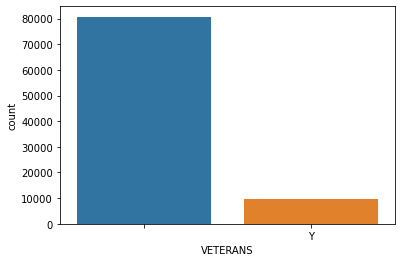

In [12]:
sns.countplot(x='VETERANS',data=df)

- REGEX /s - any white space 
- ^$ start and end of string 
- apply this to find any blanks and replace with NaN 

In [13]:
df1= df.replace(r'^\s$',np.NaN,regex=True)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  1385 non-null   object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     1833 non-null   object 
 5   GENDER    87774 non-null  object 
 6   DOMAIN    88393 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  69518 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  9846 non-null   object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [15]:
df.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

## Imputing the income value (if its useful)

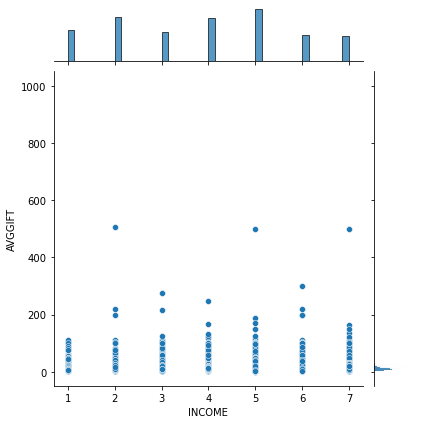

In [16]:
sns.jointplot(x=df['INCOME'],y=df['AVGGIFT']);
# as the chart shows, no clear evidence of a relationship between independent and dependent var

In [17]:
df['INCOME'].value_counts()

5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: INCOME, dtype: int64

In [18]:
np.mean(df['INCOME'])

3.8782570397522234

- impute options : median / mean fill - bias, fill with most common value (MODE)
- interpolate with pandas 
- predict the value using a model (each model is wrong but some are useful) - interpolation
    

In [19]:
# visualise 
# try something 
# visualise 
# try something else
# visualise 
# pick the best option / least worst option

In [20]:
new_income_1=df['INCOME'][0:40].interpolate(method='linear')

In [21]:
new_income_1

0          NaN
1     6.000000
2     3.000000
3     1.000000
4     3.000000
5     3.500000
6     4.000000
7     2.000000
8     3.000000
9     2.500000
10    2.000000
11    1.000000
12    4.000000
13    4.000000
14    4.000000
15    1.000000
16    1.000000
17    7.000000
18    4.000000
19    3.000000
20    2.000000
21    3.666667
22    5.333333
23    7.000000
24    7.000000
25    7.000000
26    7.000000
27    7.000000
28    4.000000
29    1.000000
30    4.000000
31    4.000000
32    4.000000
33    4.000000
34    4.000000
35    5.000000
36    6.000000
37    3.000000
38    3.000000
39    3.000000
Name: INCOME, dtype: float64

In [22]:
points_2=df['INCOME'].fillna(np.mean(df['INCOME']))

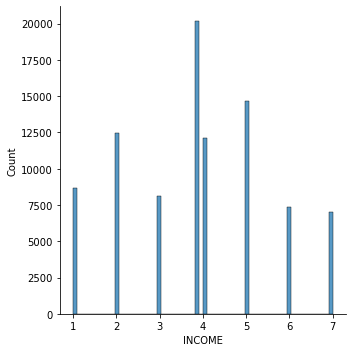

In [23]:
sns.displot(points_2);

## Reduce the number of unique strings 

In [24]:
df['STATE'].value_counts()

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
DE        3
GU        3
WV        3
DC        1
AS        1
Name: STATE, dtype: int64

In [25]:
values=pd.DataFrame(df['STATE'].value_counts())

In [26]:
values=values.reset_index()

In [27]:
values.columns=['nameofstate','count']

In [28]:
group_states=values[values['count']<1000]

In [29]:
group_states.head()

,nameofstate,count
23,AR,969
24,MS,948
25,NV,923
26,NM,824
27,NE,715


In [30]:
group_states_l=list(group_states['nameofstate'])

In [31]:
def groupthestate(x):
    if x in group_states_l:
        return 'other'
    else:
        return x 

In [32]:
df['STATE']=list(map(groupthestate,df['STATE']))

In [33]:
df['STATE'].value_counts()

CA       16284
FL        7959
other     7876
TX        7166
IL        6124
MI        5375
NC        3956
WA        3383
GA        3261
IN        2855
WI        2656
MO        2583
TN        2396
AZ        2278
MN        2081
OR        2045
CO        1929
SC        1660
AL        1627
OK        1553
KY        1542
LA        1533
KS        1233
IA        1214
Name: STATE, dtype: int64

## Reduce the number of unique values - continuous (numbers)

In [34]:
# we can also bucket numerical values using pd.qcut (quantiles-equal size groups) or pd.cut (custom)
#method : 
df['IC4_CUT']=pd.qcut(df['IC4'], 4, labels=["one", "two", "three", "four"])

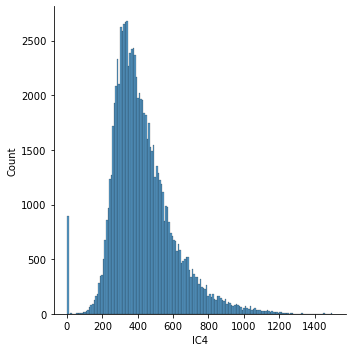

In [35]:
sns.displot(df['IC4']);

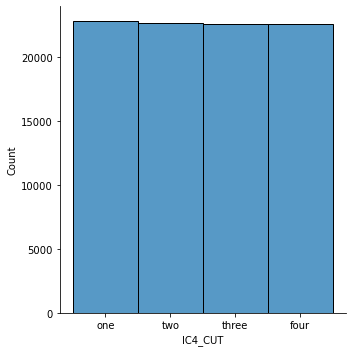

In [36]:
sns.displot(df['IC4_CUT']);

In [37]:
df[['IC4','IC4_CUT']]

,IC4,IC4_CUT
0,378,two
1,1037,four
2,340,two
3,423,three
4,321,two
...,...,...
90564,334,two
90565,535,four
90566,849,four
90567,345,two


##### thats all for today - we didnt get to VIF variation inflation factor, which checks categories for multicollinearity - but look at the useful code channel on slack for an article on this - the normal threshold is >10 

## VIF - varianceinflation factor - multicollinearity for features

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
df=df.dropna() # quick method to remove nulls

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63150 entries, 1 to 90568
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATE     63150 non-null  object  
 1   PVASTATE  63150 non-null  object  
 2   DOB       63150 non-null  int64   
 3   MDMAUD    63150 non-null  object  
 4   RECP3     63150 non-null  object  
 5   GENDER    63150 non-null  object  
 6   DOMAIN    63150 non-null  object  
 7   INCOME    63150 non-null  float64 
 8   HOMEOWNR  63150 non-null  object  
 9   HV1       63150 non-null  int64   
 10  HV2       63150 non-null  int64   
 11  HV3       63150 non-null  int64   
 12  HV4       63150 non-null  int64   
 13  IC1       63150 non-null  int64   
 14  IC2       63150 non-null  int64   
 15  IC3       63150 non-null  int64   
 16  IC4       63150 non-null  int64   
 17  IC5       63150 non-null  int64   
 18  VETERANS  63150 non-null  object  
 19  NUMPROM   63150 non-null  int64   
 20  CARDPR

In [41]:
df_cat = df.select_dtypes(include=object)
df_num = df.select_dtypes(include=np.number)

In [42]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [43]:
df_cat.head(1)

,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,...,RFA_2_L2F,RFA_2_L2G,RFA_2_L3D,RFA_2_L3E,RFA_2_L3F,RFA_2_L3G,RFA_2_L4D,RFA_2_L4E,RFA_2_L4F,RFA_2_L4G
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
df_num.head(1)

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667


In [45]:
df_full=pd.concat([df_cat,df_num],axis=1)

In [46]:
df_full.head(5)

,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,...,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
1,0,1,0,0,0,0,0,0,0,0,...,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,0,0,0,0,0,0,0,0,0,...,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,0,1,0,0,0,0,0,0,0,0,...,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,0,0,0,1,0,0,0,0,0,0,...,321,9836,113,43,10,25,9702,37,14.0,6.864865
6,0,0,0,0,0,0,0,1,0,0,...,311,10717,63,26,4,9,9702,14,4.0,7.642857


In [47]:
vif={}
df_full = add_constant(df_full) # just add a column with a constant

In [48]:
df_full.head(1)

,const,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,...,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
1,1.0,0,1,0,0,0,0,0,0,0,...,1037,36175,32,12,6,13,9702,3,18.0,15.666667


In [49]:
for i in np.arange(df_full.shape[1]): # df.shape[1] gives the length of the columns, 0 gives the length of rows.
    column_name = df_full.columns[i]
    value=variance_inflation_factor(np.array(df_full),i)
    vif[column_name]=value

In [50]:
# VIF - dictionary
sorted_vif = dict(sorted(vif.items(), key=lambda item:item[1]))

In [51]:
sorted_vif

{'PVASTATE_E': 1.0047602848553225,
 'MAXADATE': 1.019690942629758,
 'MDMAUD_C2LM': 1.0240407612619844,
 'MDMAUD_C5MM': 1.024358241896627,
 'MDMAUD_C1MM': 1.0246347778282878,
 'MDMAUD_I5MM': 1.0266346046864452,
 'MDMAUD_C5CM': 1.026882311706676,
 'VETERANS_Y': 1.0283507119651285,
 'MDMAUD_C5TM': 1.03840560001667,
 'MDMAUD_I2MM': 1.039647099009281,
 'MDMAUD_I1LM': 1.0491103726408173,
 'TIMELAG': 1.0498526374481187,
 'MDMAUD_I5CM': 1.061875477563666,
 'MDMAUD_D2MM': 1.0726821514927156,
 'MDMAUD_C2MM': 1.0760950896247061,
 'MDMAUD_D5TM': 1.0790294317355256,
 'MDMAUD_D5CM': 1.0831908678299644,
 'MDMAUD_D5MM': 1.1191452631209782,
 'MDMAUD_I2CM': 1.1209640179724052,
 'MDMAUD_L1MM': 1.1298870717031835,
 'MDMAUD_L1LM': 1.1420982015187169,
 'MDMAUD_C1LM': 1.164254835418514,
 'DOB': 1.1708818094945839,
 'RECP3_X': 1.21038475071244,
 'RFA_2_L4G': 1.2329445231436431,
 'PVASTATE_P': 1.304004549429707,
 'MDMAUD_D1CM': 1.329405604936052,
 'MDMAUD_L2CM': 1.3715998469165847,
 'MDMAUD_D2CM': 1.3756881474

## feature extraction

In [52]:
list(df.columns)

['STATE',
 'PVASTATE',
 'DOB',
 'MDMAUD',
 'RECP3',
 'GENDER',
 'DOMAIN',
 'INCOME',
 'HOMEOWNR',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'VETERANS',
 'NUMPROM',
 'CARDPROM',
 'CARDPM12',
 'NUMPRM12',
 'MAXADATE',
 'RFA_2',
 'NGIFTALL',
 'TIMELAG',
 'AVGGIFT',
 'IC4_CUT']

In [53]:
df['DOB'].unique()

array([5202,    0, 2801, 2001, 6001, 2301, 2603, 2709, 5401, 5201, 3601,
       4307, 1401, 4809, 2601, 2904, 1002, 1311, 6801, 5310, 4611,  908,
       3001, 1411, 5210, 3703, 5801, 5001, 6201, 5701, 1805, 1801, 4403,
       2512, 3605, 5101, 4401, 6501, 3501, 3812, 2101, 1101, 4707,  809,
       1408, 2909, 3901, 2006, 1206, 4612, 3701, 3201, 2108, 2901, 7201,
       2201, 3607, 2701, 2503, 1201, 5901, 2501, 1507, 2207, 6410, 1502,
        512, 2408, 3004, 5605, 1701, 4801, 4201, 5710, 1902, 6101, 3708,
       3101, 3006, 1003, 5601, 5301, 5312, 5812, 2401, 6401, 4001, 4901,
       3401, 1305, 1911, 1604, 3309, 4501, 3711, 2303, 2710, 2308, 1509,
       1912, 4903, 3102, 6310, 3105, 4709, 6107, 5208, 3312, 1510, 1001,
       4211, 1309, 4610,  401, 2910, 4602, 4301, 1105, 4212, 2310, 3912,
       3410, 2411, 4312, 3905,  506, 3301, 1610, 4101, 1904, 1504, 2809,
       1503, 4406, 1108, 4601, 1601, 2506, 3005,  812, 1506, 4605, 5502,
       5905, 4812, 2607, 1106, 2009,  101, 4909,  8

### getting the age

In [63]:
def get_age(x):
    if len(str(x)) not in (3,4):
        return 1
    else:
        if x%100 < 13:
            return 1997 - int('19'+str(x)[:2])
        

In [66]:
df['age']=list(map(get_age,df['DOB']))

In [67]:
df['age']

1        45
2         1
3        69
4        77
6        37
         ..
90559    85
90560    69
90562    52
90564    49
90568    79
Name: age, Length: 63150, dtype: int64

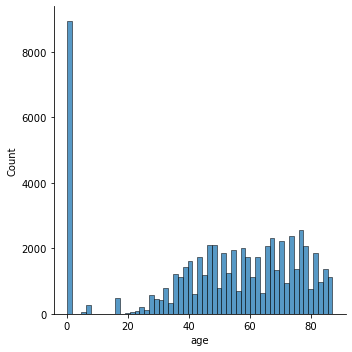

In [68]:
sns.displot(df['age']);

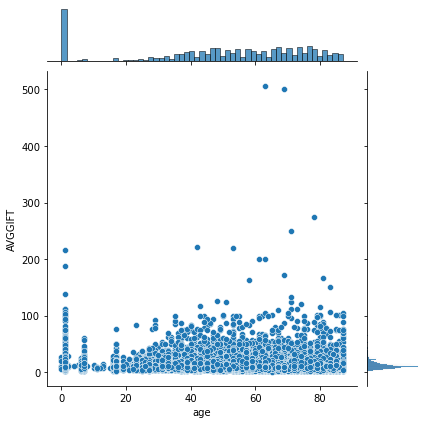

In [69]:
sns.jointplot(x=df['age'], y=df['AVGGIFT']);